In [81]:
from hepmc.core.hamiltonian.spherical_hmc import StaticSphericalHMC
from hepmc.core.densities.gaussian import Gaussian
from hepmc.core.sampling import Sample
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [6]:
D = 10
mu = np.full(D, 0.)
cov = np.empty((D, D))
for i in range(D):
    for j in range(D):
        cov[i, j] = 1/(1+abs(i-j))
target = Gaussian(D, mu, cov=cov)
lower = np.full(D, 0.)
upper = np.full(D, .5)
upper[0] = 5

In [26]:
sample = target.rvs(10000000)

In [27]:
sample = sample[np.where((sample > lower).all(axis=1))]
sample = sample[np.where((sample < upper).all(axis=1))]

In [28]:
sample.shape

(9, 10)

In [17]:
sample_df = pd.DataFrame(sample)

In [48]:
spherical_hmc.theta_to_x(np.full(D,0)+.5)

array([0.79577472, 0.07957747, 0.07957747, 0.07957747, 0.07957747,
       0.07957747, 0.07957747, 0.07957747, 0.07957747, 0.03978874])

In [65]:
spherical_hmc = StaticSphericalHMC(target, .08, .08, 4, 4, lim_lower=lower, lim_upper=upper)
start = D*[0.1]
spherical_hmc_sample = spherical_hmc.sample(20000, start)

Event 1	(batch acceptance rate: 0.000000)
Event 2	(batch acceptance rate: 0.000000)	max sequence length: 3
Event 3	(batch acceptance rate: 0.000000)	max sequence length: 4
Event 4	(batch acceptance rate: 0.000000)	max sequence length: 5
Event 5	(batch acceptance rate: 0.000000)	max sequence length: 6
Event 6	(batch acceptance rate: 0.000000)	max sequence length: 7
Event 7	(batch acceptance rate: 0.000000)	max sequence length: 8
Event 8	(batch acceptance rate: 0.000000)	max sequence length: 9
Event 9	(batch acceptance rate: 0.111111)	max sequence length: 9
Event 10	(batch acceptance rate: 0.200000)	max sequence length: 9
Event 20	(batch acceptance rate: 0.250000)	max sequence length: 9
Event 30	(batch acceptance rate: 0.366667)	max sequence length: 9
Event 40	(batch acceptance rate: 0.350000)	max sequence length: 9
Event 50	(batch acceptance rate: 0.360000)	max sequence length: 9
Event 60	(batch acceptance rate: 0.400000)	max sequence length: 9
Event 70	(batch acceptance rate: 0.414286)

In [82]:
spherical_hmc_sample = Sample(data=spherical_hmc_sample.data[5000:], weights=spherical_hmc_sample.weights[5000:])

In [83]:
spherical_hmc_df = pd.DataFrame(spherical_hmc_sample.data)

In [84]:
spherical_hmc_sample.data.mean(axis=0)

array([2.16978268, 0.25210586, 0.24892964, 0.25054713, 0.250837  ,
       0.24747615, 0.25259996, 0.25009953, 0.25116363, 0.24602157])

In [85]:
np.partition(spherical_hmc_sample.weights, -4)[-4:]

array([2.63954478e-05, 2.66518280e-05, 3.30993650e-05, 3.75261435e-05])

In [86]:
np.argpartition(spherical_hmc_sample.weights, -4)[-4:]

array([ 5094,  3624, 13290, 10640])

In [50]:
print('min:', spherical_hmc_sample.weights.min())
print('max:', spherical_hmc_sample.weights.max())
print('mean:', spherical_hmc_sample.weights.mean())
print('std:', spherical_hmc_sample.weights.std())

min: 6.501460900139223e-08
max: 0.9293500968672308
mean: 4.7682813781447036e-05
std: 0.006571685084103729


<IPython.core.display.Javascript object>


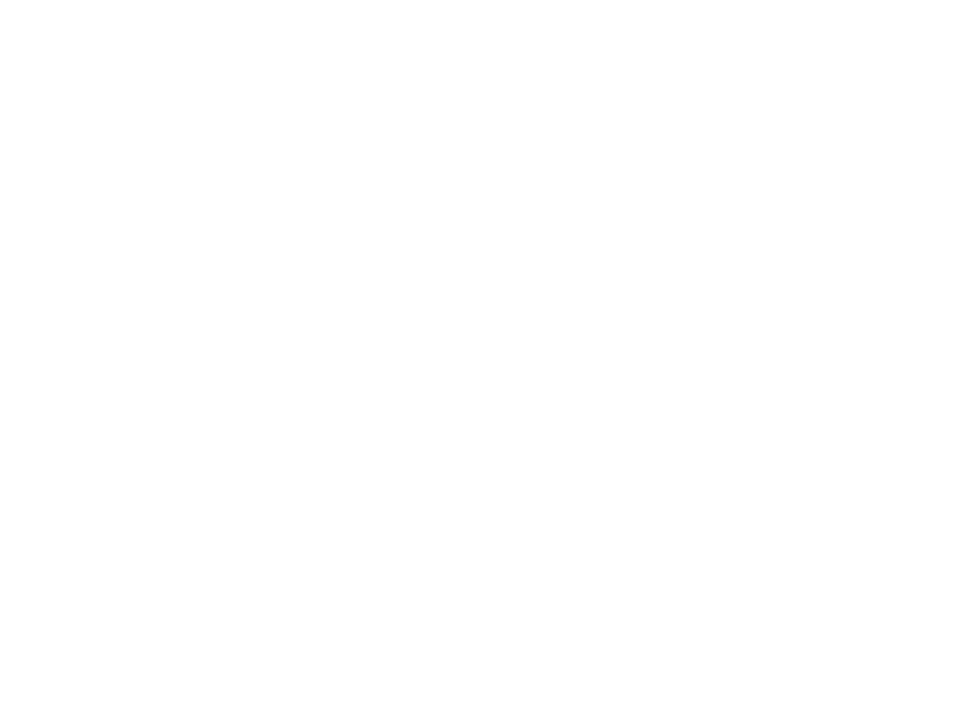

<IPython.core.display.Javascript object>


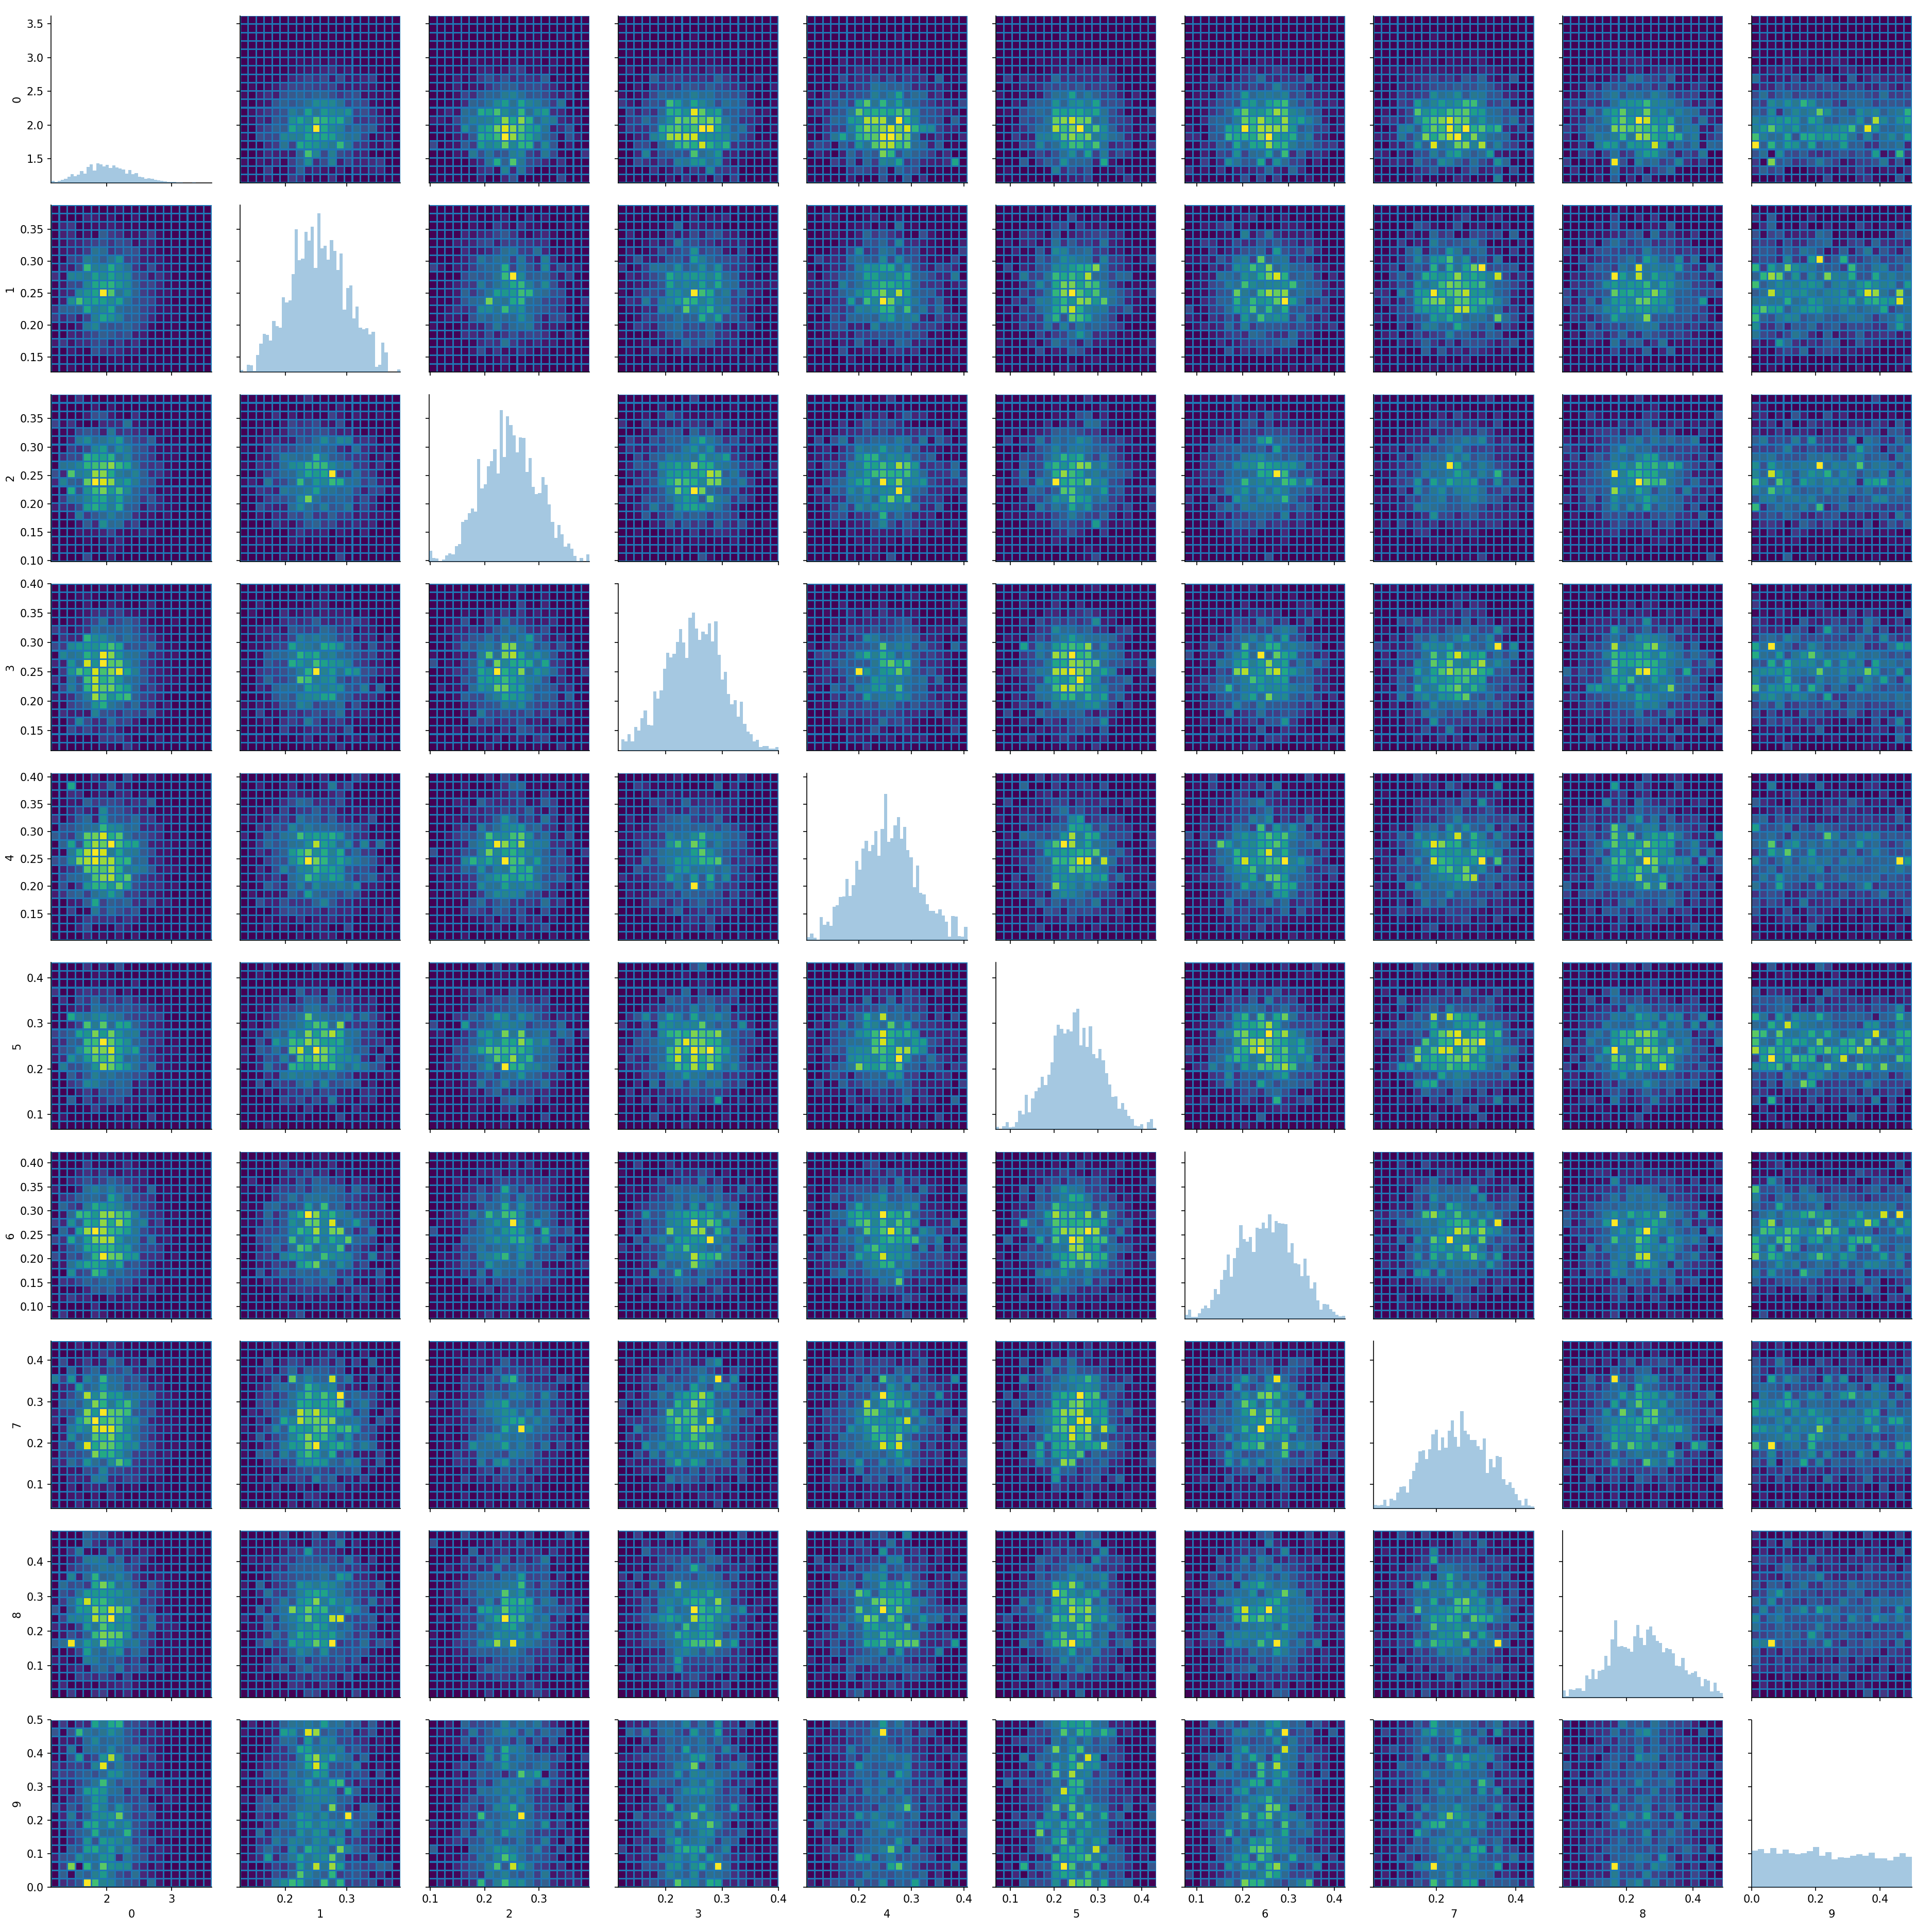

In [87]:
#plt.figure(0)
#g = sns.PairGrid(sample_df)
#g = g.map_diag(sns.distplot, norm_hist=True, kde=False)
#g = g.map_offdiag(plt.hist2d, bins=20)
plt.figure(1)
h = sns.PairGrid(spherical_hmc_df)
h = h.map_diag(sns.distplot, norm_hist=True, kde=False, hist_kws={"weights" : spherical_hmc_sample.weights})
h = h.map_offdiag(plt.hist2d, weights=spherical_hmc_sample.weights, bins=20)
#h = h.map_diag(sns.distplot, norm_hist=True, kde=False)
#h = h.map_offdiag(plt.hist2d, bins=20)

In [ ]:
fig, ax = plt.subplots(1, 2, sharey='row', figsize=(10,5))
#ax1 = fig.add_subplot(1, 2, 1)
ax[0].plot(x, y, 'r-')
sns.distplot(spherical_hmc_df[0], ax=ax[0], kde=False, norm_hist=True, hist_kws={"weights" : spherical_hmc_sample.weights})
#ax2 = fig.add_subplot(1, 2, 2)
ax[1].plot(x, y, 'r-')
sns.distplot(spherical_hmc_df[1], ax=ax[1], kde=False, norm_hist=True, hist_kws={"weights" : spherical_hmc_sample.weights})

In [ ]:
util.effective_sample_size(spherical_hmc_sample, spherical_hmc_sample.mean, spherical_hmc_sample.variance)

In [ ]:
# resample
resamp_idx = np.random.choice(1000, 1000, p=spherical_hmc_sample.weights/spherical_hmc_sample.weights.sum())
spherical_hmc_resample = MarkovSample(data=spherical_hmc_sample.data[resamp_idx])
spherical_hmc_resample_df = pd.DataFrame(spherical_hmc_resample.data)

In [ ]:
fig, ax = plt.subplots(1, 2, sharey='row', figsize=(10,5))
#ax1 = fig.add_subplot(1, 2, 1)
ax[0].plot(x, y, 'r-')
sns.distplot(spherical_hmc_resample_df[0], ax=ax[0], kde=False, norm_hist=True)
#ax2 = fig.add_subplot(1, 2, 2)
ax[1].plot(x, y, 'r-')
sns.distplot(spherical_hmc_resample_df[1], ax=ax[1], kde=False, norm_hist=True)

In [ ]:
plt.figure()
grid = sns.jointplot(x=0, y=1, data=spherical_hmc_resample_df, kind="hex", marginal_kws={"norm_hist" : True})
grid.ax_marg_x.axes.plot(x, y, 'r-')
grid.ax_marg_y.axes.plot(y, x, 'r-')